# CareerFoundry Exercise 6.6 Sourcing & Analyzing Time Series Data

## 3. Importing libraries and creating a subset of dataset

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [47]:
path = r'C:\Users\rmr1q.000\Desktop\CareerFoundry\Section 6\Data'
data = pd.read_csv(os.path.join(path, 'Lebron James Games CSV.csv'))

In [48]:
data.shape

(1615, 32)

In [49]:
data.head()

,Game,Game Played,Date,Age,Year,Age(Y),Team,Home Away,Opp,WL,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,PM
0,1,1.0,10/29/2003,18-303,2003,18,CLE,Away,SAC,L (-14),...,4.0,6.0,9.0,4.0,0.0,2.0,3.0,25.0,24.7,-9.0
1,2,2.0,10/30/2003,18-304,2003,18,CLE,Away,PHO,L (-9),...,10.0,12.0,8.0,1.0,0.0,7.0,1.0,21.0,14.7,-3.0
2,3,3.0,11/1/2003,18-306,2003,18,CLE,Away,POR,L (-19),...,4.0,4.0,6.0,2.0,0.0,2.0,3.0,8.0,5.0,-21.0
3,4,4.0,11/5/2003,18-310,2003,18,CLE,Home,DEN,L (-4),...,9.0,11.0,7.0,2.0,3.0,2.0,1.0,7.0,11.2,-3.0
4,5,5.0,11/7/2003,18-312,2003,18,CLE,Away,IND,L (-1),...,5.0,5.0,3.0,0.0,0.0,7.0,2.0,23.0,9.0,-7.0


In [50]:
data.tail()

,Game,Game Played,Date,Age,Year,Age(Y),Team,Home Away,Opp,WL,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,PM
1610,8,8.0,11/8/2023,38-313,2023,38,LAL,Away,HOU,L (-34),...,5.0,6.0,2.0,0.0,0.0,3.0,1.0,18.0,11.5,-24.0
1611,9,9.0,11/10/2023,38-315,2023,38,LAL,Away,PHO,W (+3),...,10.0,11.0,6.0,1.0,1.0,4.0,1.0,32.0,28.1,2.0
1612,10,NaN,11/12/2023,38-317,2023,38,LAL,Home,POR,W (+6),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1613,11,10.0,11/14/2023,38-319,2023,38,LAL,Home,MEM,W (+27),...,9.0,9.0,6.0,1.0,0.0,4.0,1.0,16.0,13.8,15.0
1614,12,11.0,11/15/2023,38-320,2023,38,LAL,Home,SAC,L (-15),...,8.0,10.0,11.0,4.0,1.0,6.0,1.0,28.0,30.5,0.0


In [51]:
data_sub = data[['Year', 'GmSc']]

In [52]:
#In order to make the dataset have a consistent frequency for the decomposition function, the gamescore must averaged by year.

data_sub = data_sub.groupby('Year')['GmSc'].mean().reset_index()

In [53]:
data_sub.shape

(21, 2)

In [57]:
# Setting the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Year'], format='%Y') # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Year'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

KeyError: 'Year'

In [58]:
data_sub.shape

(21, 1)

In [59]:
data_sub.columns

Index(['GmSc'], dtype='object')

The game score variable is a way to determine a player's efficiency in a game. The definition provided by Sports Reference is: 

"Game Score; the formula is PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV. Game Score was created by John Hollinger to give a rough measure of a player's productivity for a single game. The scale is similar to that of points scored, (40 is an outstanding performance, 10 is an average performance, etc.)."

In [60]:
data_sub.isnull().sum()

GmSc    0
dtype: int64

In [61]:
type(data_sub)

pandas.core.frame.DataFrame

## 4. Create a linechart of the data

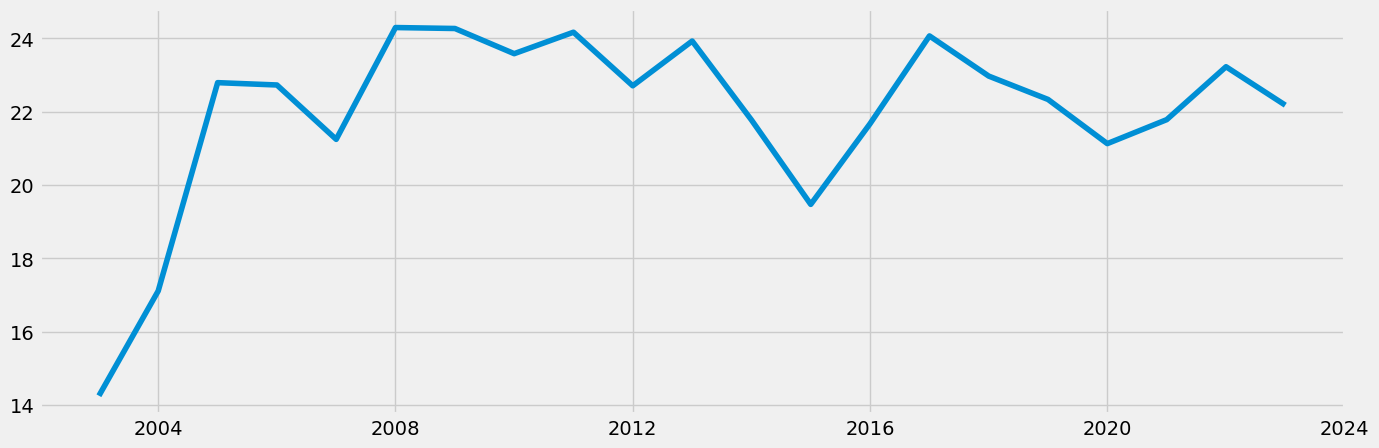

In [62]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_sub);

## 5. Decomposing data components

In [63]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [64]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

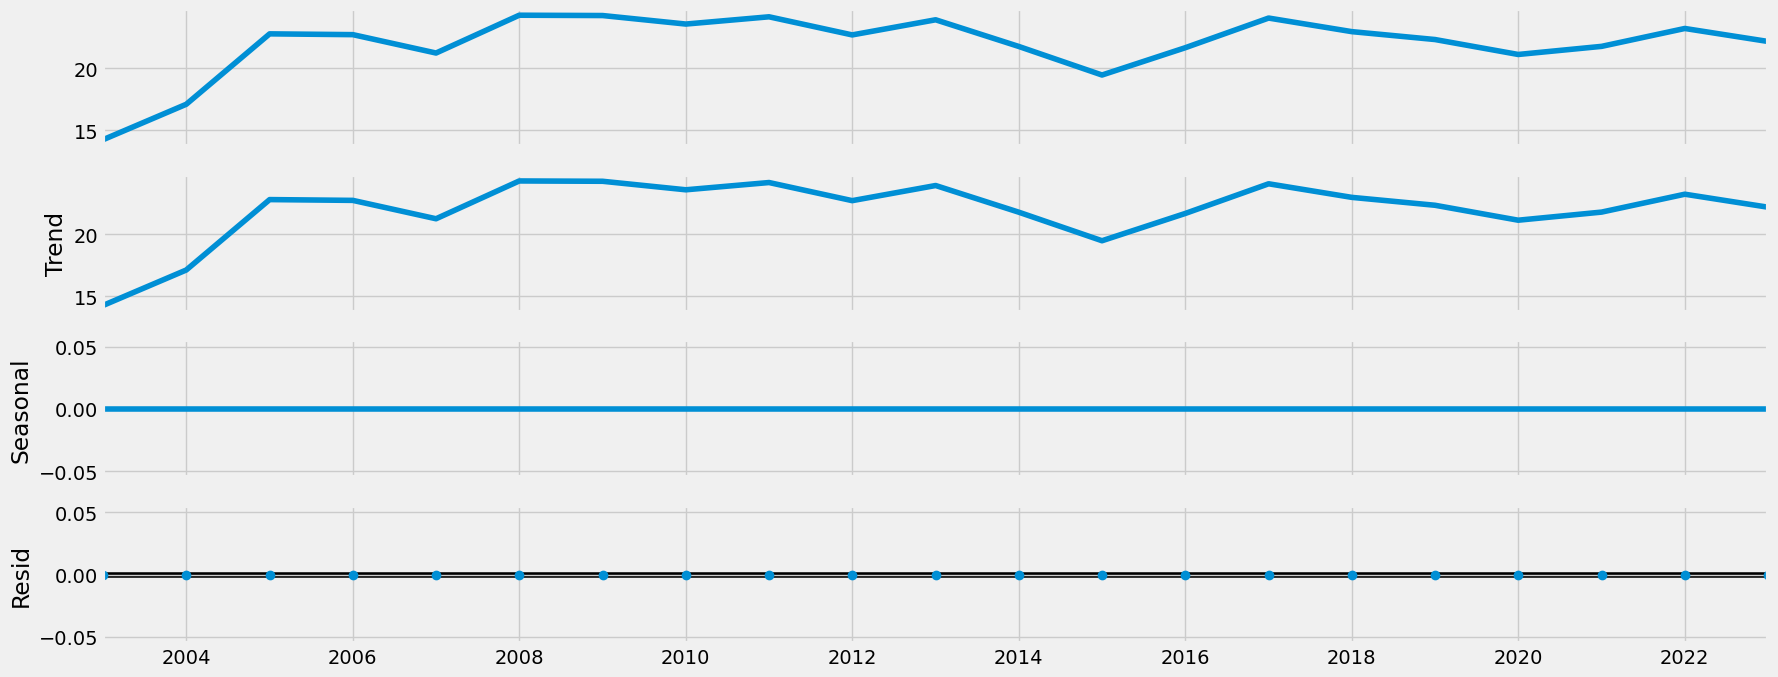

In [65]:
# Plot the separate components

decomposition.plot()
plt.show()

The resulting graph shows that there is no seasonality at all in the subset. This is expected because the data is taken from a yearly basis which removes any annual patterns that are essential for having seasonality. There is also no noise detected in the data which would be the cause for unrelated jumps or drops. There is likely too little data points for any noise to be detected. It appears the data level and trend are the same. 

## 6. Conduct Dickey Fuller Test

In [67]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['GmSc'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.530339
p-value                         0.108266
Number of Lags Used             8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


The p value is fairly low at 0.108 but not low enough to reject the null hypothesis and say that the data is indeed stationary. Before proceeding with a forecast the data must be stationarized.

## 7. Stationarizing by differencing

In [68]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [69]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [70]:
data_diff.head()

,GmSc
datetime,
2004-01-01,2.857401
2005-01-01,5.679347
2006-01-01,-0.063623
2007-01-01,-1.482250
2008-01-01,3.048500


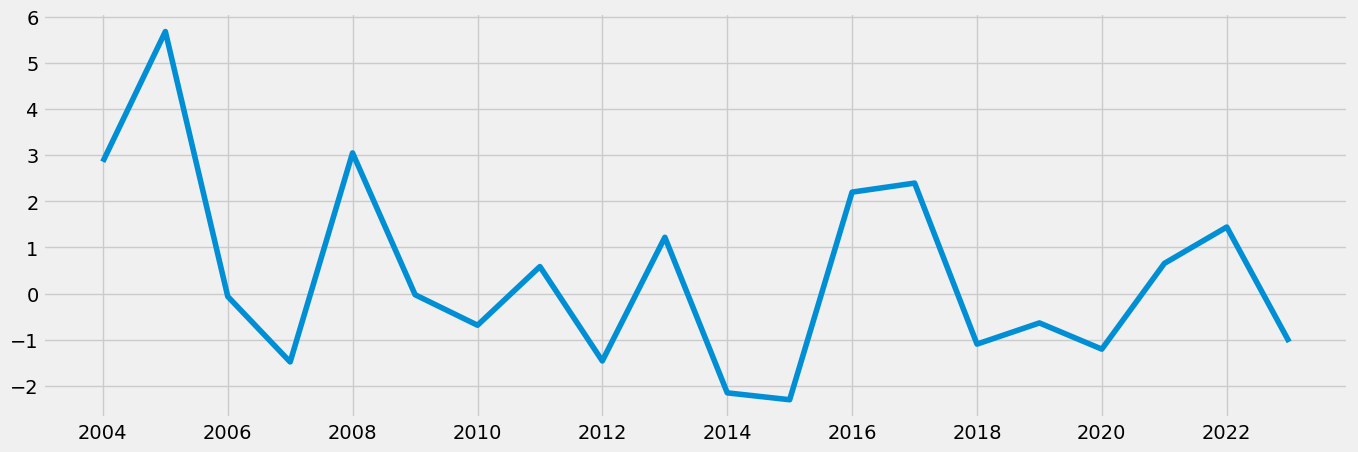

In [71]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [72]:
#Rerunning the Dickey Fuller test on the stationarized data

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -5.785908e+00
p-value                        5.000222e-07
Number of Lags Used            1.000000e+00
Number of Observations Used    1.800000e+01
Critical Value (1%)           -3.859073e+00
Critical Value (5%)           -3.042046e+00
Critical Value (10%)          -2.660906e+00
dtype: float64


The test statistic decreased from -2.53 to -5.79 after differencing. The p value is now 0.0000005 which is well below the necessary value of 0.05 to be considered significant. Therefore, we can reject the null hypothesis and confirm that there is no unit root in the data and we can proceed with the forecast.

## 9. Checking autocorrelations

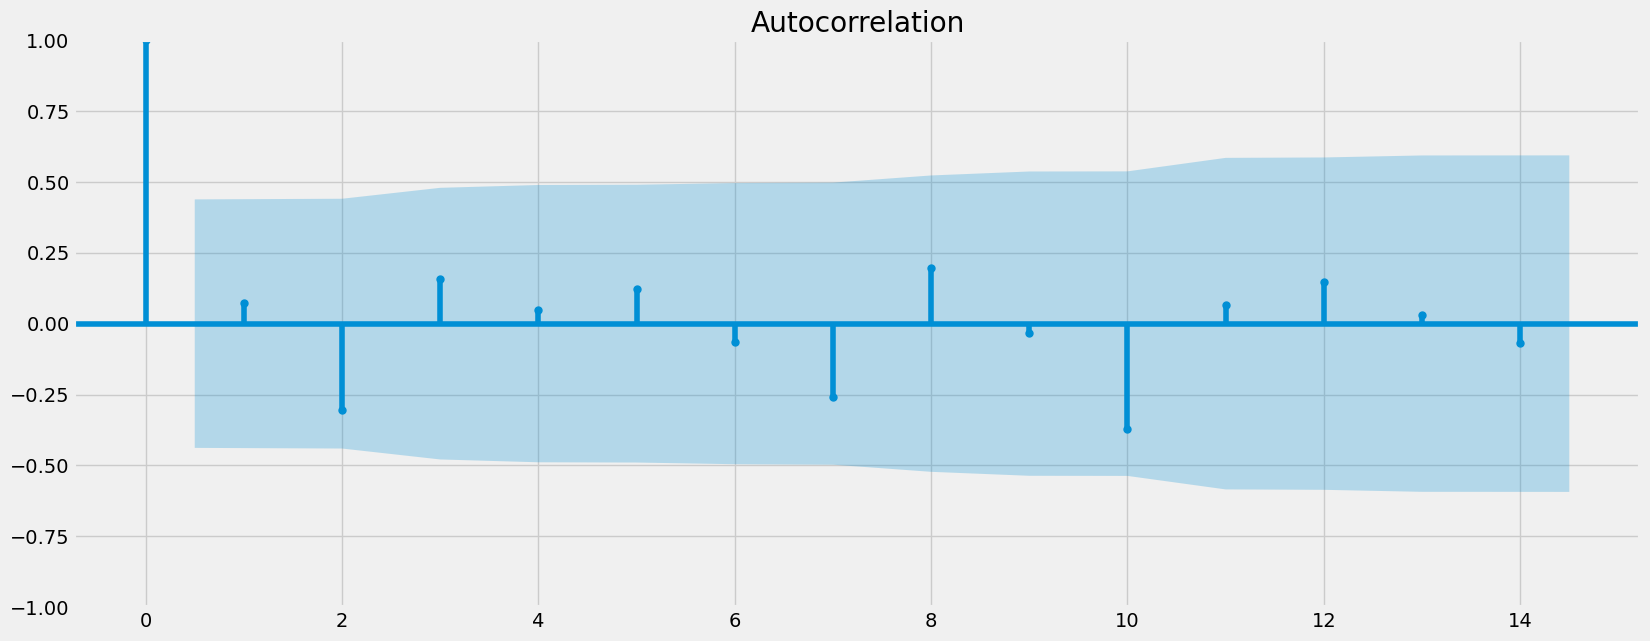

In [74]:
#Plotting the autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()

Besides the line at 0, all lags are within the blue area which m